In [1]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/ontap-ffb-bay200/'
    lamont_path = '/home/andbro/lamont/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'

In [5]:
config = {}

config['camera'] = "05"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"


# experiment 4 (after readjustment and monobeams at RZ 2024-07-29)
config['date1'] = "2024-08-02"
config['date2'] = UTCDateTime.now().date


In [6]:
mlti = __load_mlti(config['date1'], config['date2'], "Z", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [7]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [8]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-08-02
2024-08-03
2024-08-04
2024-08-05
error for 20240805.pkl


In [9]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-08-02T00:05:07.000000Z,588.259030,518.442251,588.0,518.0,202.143764,150.356368,146.311333,7.863531e-37,7.043102,0.001026,0.000972,0.001855,0.001143,0.001211,0.000031,0.000084,0.0
1,2024-08-02T00:08:06.000000Z,588.241591,518.446331,588.0,518.0,197.778777,150.317679,146.204716,4.094161e-34,6.963222,0.001033,0.000977,0.001788,0.001149,0.001218,0.000030,0.000081,179.0
2,2024-08-02T00:14:07.000000Z,588.252155,518.466882,588.0,518.0,198.069773,150.250200,146.204921,4.747469e-36,7.642722,0.001032,0.000978,0.001794,0.001150,0.001218,0.000031,0.000081,540.0
3,2024-08-02T00:28:07.000000Z,588.258540,518.496754,588.0,518.0,197.286752,150.281888,146.250514,2.617427e-34,7.307866,0.001034,0.000979,0.001782,0.001152,0.001220,0.000031,0.000080,1380.0
4,2024-08-02T00:35:07.000000Z,588.255061,518.543448,588.0,518.0,197.577398,150.269497,146.208043,3.377227e-35,7.201898,0.001033,0.000978,0.001786,0.001150,0.001219,0.000030,0.000081,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2024-08-04T23:11:07.000000Z,587.894511,524.580965,587.0,524.0,205.188847,150.275317,146.339476,9.147218e-36,7.919194,0.000977,0.000926,0.001821,0.001089,0.001152,0.000031,0.000082,255960.0
428,2024-08-04T23:20:07.000000Z,587.898640,524.559388,587.0,524.0,205.219290,150.252825,146.347656,2.046980e-34,8.003942,0.000976,0.000926,0.001822,0.001090,0.001152,0.000031,0.000082,256500.0
429,2024-08-04T23:40:07.000000Z,587.881293,524.673243,587.0,524.0,206.499970,150.303557,146.361047,1.432784e-35,7.883101,0.000975,0.000924,0.001840,0.001087,0.001150,0.000031,0.000083,257700.0
430,2024-08-04T23:44:06.000000Z,587.897222,524.642374,587.0,524.0,205.563694,150.230140,146.344162,2.408597e-35,8.306424,0.000975,0.000925,0.001826,0.001088,0.001151,0.000031,0.000082,257939.0


### Remove MLTI times

In [10]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


In [11]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan
0,2024-08-02T00:05:07.000000Z,3.117773,2.747744,3.1164,2.7454,202.143764,150.356368,146.311333,7.863531e-37,7.043102,...,0.000972,0.001855,0.001143,0.001211,0.000031,0.000084,0.0,2024-08-01T23:05:07.000000Z,2.7454,3.1164
1,2024-08-02T00:08:06.000000Z,3.117680,2.747766,3.1164,2.7454,197.778777,150.317679,146.204716,4.094161e-34,6.963222,...,0.000977,0.001788,0.001149,0.001218,0.000030,0.000081,179.0,2024-08-01T23:08:06.000000Z,2.7454,3.1164
2,2024-08-02T00:14:07.000000Z,3.117736,2.747874,3.1164,2.7454,198.069773,150.250200,146.204921,4.747469e-36,7.642722,...,0.000978,0.001794,0.001150,0.001218,0.000031,0.000081,540.0,2024-08-01T23:14:07.000000Z,2.7454,3.1164
3,2024-08-02T00:28:07.000000Z,3.117770,2.748033,3.1164,2.7454,197.286752,150.281888,146.250514,2.617427e-34,7.307866,...,0.000979,0.001782,0.001152,0.001220,0.000031,0.000080,1380.0,2024-08-01T23:28:07.000000Z,2.7454,3.1164
4,2024-08-02T00:35:07.000000Z,3.117752,2.748280,3.1164,2.7454,197.577398,150.269497,146.208043,3.377227e-35,7.201898,...,0.000978,0.001786,0.001150,0.001219,0.000030,0.000081,1800.0,2024-08-01T23:35:07.000000Z,2.7454,3.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2024-08-04T23:11:07.000000Z,3.115841,2.780279,3.1111,2.7772,205.188847,150.275317,146.339476,9.147218e-36,7.919194,...,0.000926,0.001821,0.001089,0.001152,0.000031,0.000082,255960.0,2024-08-04T22:11:07.000000Z,2.7772,3.1111
428,2024-08-04T23:20:07.000000Z,3.115863,2.780165,3.1111,2.7772,205.219290,150.252825,146.347656,2.046980e-34,8.003942,...,0.000926,0.001822,0.001090,0.001152,0.000031,0.000082,256500.0,2024-08-04T22:20:07.000000Z,2.7772,3.1111
429,2024-08-04T23:40:07.000000Z,3.115771,2.780768,3.1111,2.7772,206.499970,150.303557,146.361047,1.432784e-35,7.883101,...,0.000924,0.001840,0.001087,0.001150,0.000031,0.000083,257700.0,2024-08-04T22:40:07.000000Z,2.7772,3.1111
430,2024-08-04T23:44:06.000000Z,3.115855,2.780605,3.1111,2.7772,205.563694,150.230140,146.344162,2.408597e-35,8.306424,...,0.000925,0.001826,0.001088,0.001151,0.000031,0.000082,257939.0,2024-08-04T22:44:06.000000Z,2.7772,3.1111


### Remove artefacts

In [12]:
# remove corrupt values
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 20]

# when intensity is super high or saturated, there is likely a MLTI boost
df = df[df['amp'] < 255]

### Plotting

In [13]:
from functions.reduce import __reduce

In [14]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

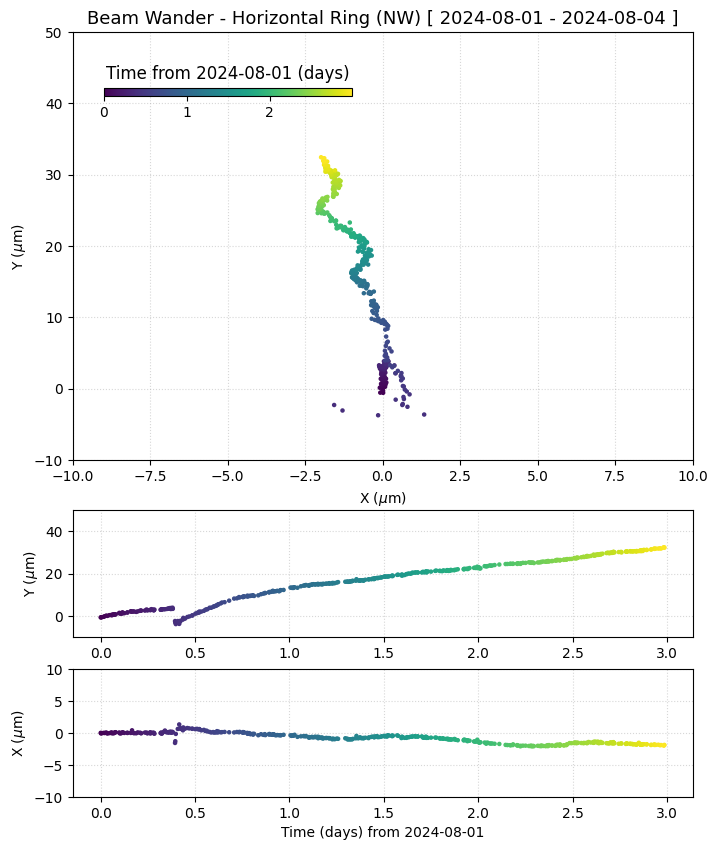

In [20]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -10, 10
    y1, y2 = -10, 50
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(y1, y2)
    ax2.set_ylim(y1, y2)
    ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - Horizontal Ring (NW) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


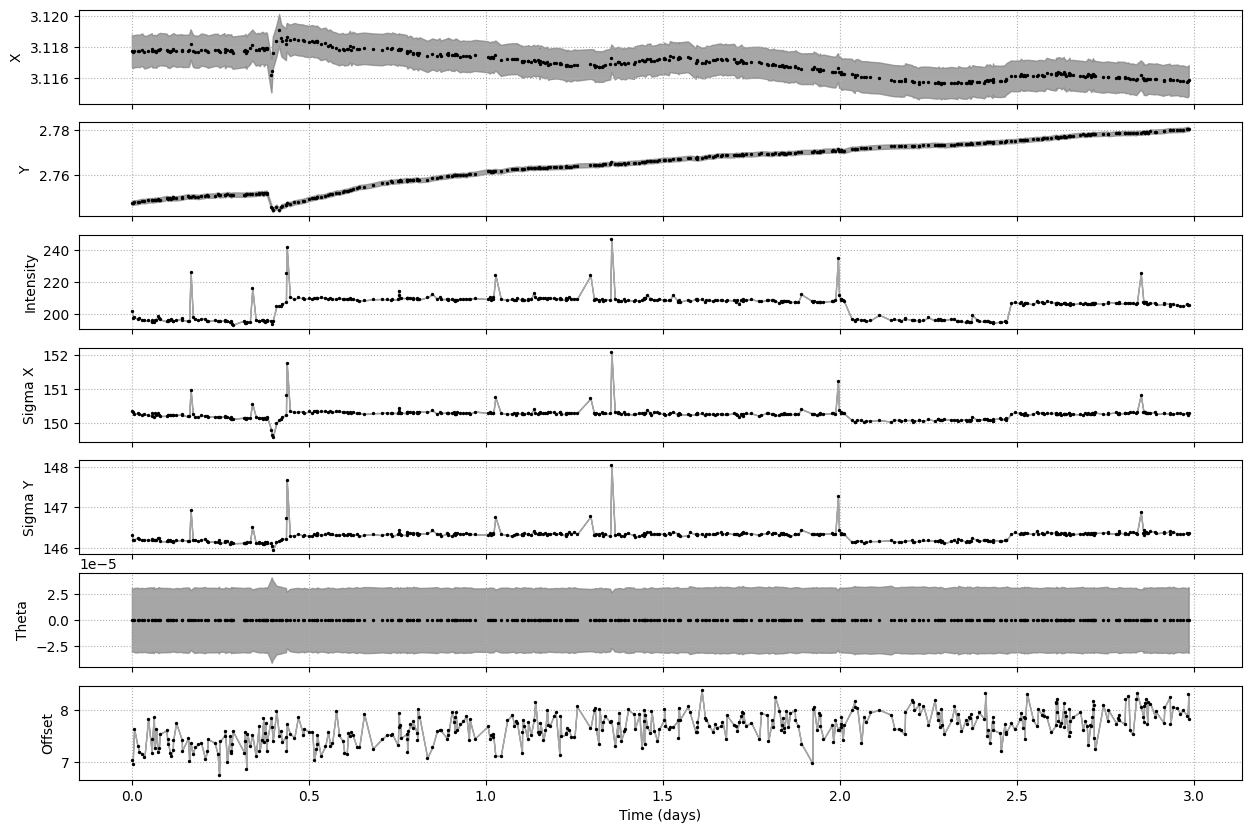

In [19]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


In [16]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan,x_um_rel,y_um_rel
0,2024-07-29T00:23:07.000000Z,3.129114,2.253286,3.127,2.2525,37.182197,144.805408,141.309442,5.345959,3.845851,...,0.001239,0.001299,0.000045,0.000003,0.0,2024-07-28T23:23:07.000000Z,2.2525,3.127,0.084863,0.728655
1,2024-07-29T00:25:06.000000Z,3.129007,2.253033,3.127,2.2525,37.343808,144.804592,141.294720,11.624477,3.895230,...,0.001233,0.001293,0.000044,0.000003,119.0,2024-07-28T23:25:06.000000Z,2.2525,3.127,-0.021687,0.475619
2,2024-07-29T00:30:07.000000Z,3.128939,2.251886,3.127,2.2472,38.043636,141.326481,144.754736,16.346376,4.046241,...,0.001260,0.001203,0.000045,0.000003,420.0,2024-07-28T23:30:07.000000Z,2.2472,3.127,-0.090148,-0.671580
3,2024-07-29T00:34:07.000000Z,3.129050,2.251726,3.127,2.2472,38.082770,141.389518,144.758711,3.787207,3.912504,...,0.001252,0.001196,0.000047,0.000003,660.0,2024-07-28T23:34:07.000000Z,2.2472,3.127,0.020582,-0.830954
4,2024-07-29T00:35:07.000000Z,3.128996,2.252174,3.127,2.2525,37.988242,141.352183,144.782842,72.909971,3.985647,...,0.001258,0.001200,0.000045,0.000003,720.0,2024-07-28T23:35:07.000000Z,2.2525,3.127,-0.033130,-0.383576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2024-08-04T23:02:07.000000Z,2.599205,2.274193,2.597,2.2737,207.245893,106.044827,109.857080,0.445620,1.242524,...,0.000537,0.000501,0.000017,0.000032,599940.0,2024-08-04T22:02:07.000000Z,2.2737,2.597,-529.824345,21.635915
845,2024-08-04T23:24:07.000000Z,2.599117,2.274486,2.597,2.2737,207.592256,106.028601,109.831703,0.441509,1.231860,...,0.000538,0.000501,0.000017,0.000032,601260.0,2024-08-04T22:24:07.000000Z,2.2737,2.597,-529.912562,21.929188
846,2024-08-04T23:30:06.000000Z,2.599091,2.274475,2.597,2.2737,207.648666,106.080070,109.871886,0.445650,1.266895,...,0.000537,0.000501,0.000017,0.000032,601619.0,2024-08-04T22:30:06.000000Z,2.2737,2.597,-529.937813,21.917820
847,2024-08-04T23:33:07.000000Z,2.599283,2.274392,2.597,2.2737,209.827114,106.055939,109.861614,0.445130,1.257795,...,0.000536,0.000499,0.000017,0.000033,601800.0,2024-08-04T22:33:07.000000Z,2.2737,2.597,-529.745847,21.834587
